# The Floow Technical challenge
<br>


In [133]:
#----------------------------------------------------------------------------------------------
path =r'C:\Users\Kyled\Downloads\all journeys - Document Classification_ Sensitive\all journeys' 
outfile=r'C:\Users\Kyled\Downloads\all journeys - Document Classification_ Sensitive\output.csv'
#----------------------------------------------------------------------------------------------


## Libraries

In [134]:

#-------------------------------------------------
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
import seaborn as sns
from scipy import stats
import scipy.stats as st
import warnings
import os
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.20f}'.format
pd.options.mode.chained_assignment = None
#--------------------------------------------------

## Functions

In [135]:
#------------------------------
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1


def f(col):
    if col['M_A'] ==1 & col['B']==1:
        val = 'Accident'
    
    else:
        val = 'N'
    return val
#--------------------------------

## Wrangle

In [136]:

#---------------------------------------------------------------------
files = glob.glob(path +'/*.csv') 

df = pd.concat([pd.read_csv(fp).assign(File_ref=os.path.basename(fp)) for fp in files])
r, c = df.shape
print("Sum of rows from concatenation:\n"
      "Total rows =" ,r,"\nTotal columns =",c)
#----------------------------------------------------------------------


Sum of rows from concatenation:
Total rows = 289087 
Total columns = 13


In [137]:
df.head
df.describe()

,timestamp,accuracy,bearing,height,lat,lon,speed,timestamp,x,y,z
count,4426.00000000000000000000,24953.00000000000000000000,24953.00000000000000000000,24953.00000000000000000000,24953.00000000000000000000,24953.00000000000000000000,24953.00000000000000000000,284661.00000000000000000000,264134.00000000000000000000,264134.00000000000000000000,264134.00000000000000000000
mean,1434838875516.38476562500000000000,7.66027485087965409605,170.29732528403408764461,571.19262352398948223708,37.84673961439274592067,-88.08851914294392315696,8.23017865745506860264,1430237091633.73046875000000000000,-0.03466801341072058007,-0.13861128008784137644,-0.15512119093730256103
std,115219.01106408258783631027,5.78622403277270791477,110.34017414043344729180,1043.51733087421962409280,6.43281581156617932038,7.91270142341021642807,9.06198017053050897118,3732532476.65347766876220703125,0.73053887199862777013,1.03604518985802851461,1.37911712994510371466
min,1434838676097.07006835937500000000,3.00000000000000000000,-1.00000000000000000000,-16.17600325000000083264,25.64723389999999625388,-106.97387240000001895623,-1.00000000000000000000,1421058397238.67993164062500000000,-15.79933699999999952013,-19.61329999999999884608,-13.59188299999999927081
25%,1434838775767.57006835937500000000,5.00000000000000000000,80.15625000000000000000,158.98163269999997737614,33.83121103999999945700,-88.24503927000000658154,0.00000000000000000000,1426800795993.87011718750000000000,-0.22721863000000000476,-0.48722458250000005853,-0.91058349999999987912
50%,1434838875503.57006835937500000000,5.00000000000000000000,179.29687500000000000000,203.37050990000003025671,40.68627900999999980058,-85.45246432000000424978,3.98000001899999977795,1429903868203.82006835937500000000,-0.00953674300000000030,-0.08328246999999999733,-0.52674102999999994346
75%,1434838975247.82006835937500000000,10.00000000000000000000,268.59375000000000000000,261.65849300000002131128,42.32121519999999748052,-83.04635016000000291569,15.00000000000000000000,1434719243633.26000976562500000000,0.10264587399999999806,0.12504577999999999527,0.10942840624999999877
max,1434839075017.07006835937500000000,50.00000000000000000000,359.64843750000000000000,3616.49871899999970992212,44.89864271999999800755,-80.10532424000000162323,50.29999923999999822399,1435164720979.00000000000000000000,19.61270100000000127238,10.92593999999999887507,19.61270100000000127238


## Cleansing

### Time

In [138]:
df['DateTime'] = pd.to_datetime(df.iloc[:,0].combine_first(df.timestamp), unit='ms')
df['Date'] = df['DateTime'].dt.date
df['Unit_check']=(np.abs(df['x'])+np.abs(df['y'])+np.abs(df['z']))/3
table=pd.pivot_table(df,index=["File_ref"])
dfb = table[table['Unit_check']>2].index.values.astype(str)[0]
print("Files with units in m s^-1 :",dfb)

Files with units in m s^-1 : b0b25b30-c3b3-48a4-9e20-810363501c64.csv


### Acceleration 

Magnitude of acceleration vector since we have no fixed orientation 

\begin{align}
\ | a\vec\ |=\sqrt{a_x^2+a_y^2+a_z^2}
\end{align}

In [139]:
s=df[df['File_ref'].str.contains(dfb)]
df=df[~df['File_ref'].str.contains(dfb)]
df['Mag/G']=np.sqrt(df.x**2+df.y**2+df.z**2)
df['Mag/G'].fillna(0, inplace=True)

s['Mag/G']=np.sqrt(s.x**2+s.y**2+s.z**2)/9.81
s['Mag/G'].fillna(0, inplace=True)

df=df.append(s)


### Units 

In [140]:
df.rename({'bearing': 'bearing/deg', 'height': 'height/m',
           'speed': 'speed m s^-1 (scalar)'}, inplace=True,axis=1)
df['Speed km h^-1']=df['speed m s^-1 (scalar)']*3.6 # m s^-1 is the SI unit, but km h^-1 helpful

In [141]:
#Copy of df with relevant columns 
output= pd.DataFrame(df[['Date','DateTime', 'Mag/G', 'Speed km h^-1','height/m',
                         'bearing/deg','lat', 'lon','File_ref']].copy()
)


To construct a suitable metric we will need to fill values for the speed.
I chose to fill with the average between values dynamically because both forward propogation and column wide mean are not appropriate.

In [142]:
output['Speed km h^-1']=output['Speed km h^-1'].interpolate()

### Understanding the data

##### Speed

count   289087.00000000000000000000
mean        29.47127423774077215057
std         32.12880740233888587909
min         -3.60000000000000008882
25%          0.00000000000000000000
50%         14.48836394367272895067
75%         52.47600002400000107627
max        181.07999726399998507986
Name: Speed km h^-1, dtype: float64

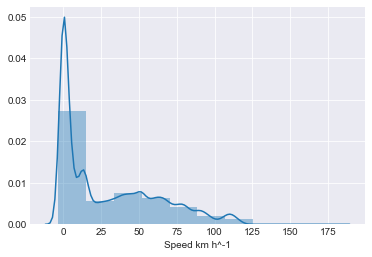

In [143]:
sns.set_style('darkgrid')
sns.distplot(output['Speed km h^-1'].dropna(),bins=10)
output['Speed km h^-1'].describe()

Data is heavily skewed towards lower speeds,which is consistent with reality.Data will need to be normalised to score appropriatley.Mean here is ~30 km h^-1

#### Acceleration

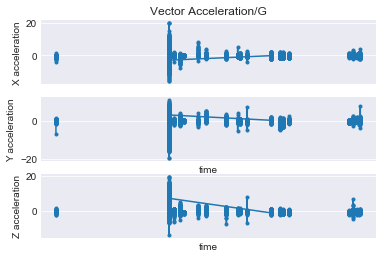

In [144]:
#-------------
x = df.DateTime
x_accel = df.x
y_accel = df.y
z_accel = df.z
#--------------------
plt.subplot(3, 1, 1)
plt.plot(x, x_accel, '.-')
plt.title('Vector Acceleration/G')
plt.ylabel('X acceleration')
plt.xticks([])
plt.subplot(3, 1, 2)
plt.plot(x, y_accel, '.-')
plt.xlabel('time')
plt.ylabel('Y acceleration')
plt.xticks([])
plt.subplot(3, 1, 3)
plt.plot(x, z_accel, '.-')
plt.xlabel('time')
plt.ylabel('Z acceleration')
plt.xticks([])

plt.show()

0.927881468371393

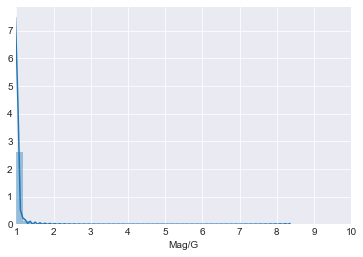

In [145]:
plt.xlim(1, 10)
sns.distplot(output['Mag/G'].dropna(),bins=50)
np.mean(output['Mag/G'])


Again we have a heavy skew towards lower accelerations. This is consistent with the bulk of driving (i.e no events). Normalisation to be applied.

### Process

$AD: x -> \{0,1\}$

(1) a high acceleration event whilst the vehicle is moving
above the threshold speed, $M_S$.


$$AD (x,y)=
\begin{cases}
(M_A,β)==1,\\
\; 0
\end{cases}
$$




First we consider acceleration events from the phone alone i.e false positives 
Here we set $M_A$, the minimum acceleration for an acceleration event to trigger accident detection.

$M_A = 4$




In [146]:
output['M_A'] = np.where(output['Mag/G']<4, 0, 1)
output['M_A'].value_counts()

0    289001
1        86
Name: M_A, dtype: int64

$M_S$ is the minimum speed in order to activate the accident detection system and serves as a low pass filter to rule out other activities and ensure the phone is in the vehicle.

$β$ is a speed threshold variable with value 1 if the phone has been traveling at greater than $M_S$.

$M_S = 25$ 

In [147]:
M_S = 25
output['B'] = np.where(output['Speed km h^-1']>M_S, 1, 0)
output['B'].value_counts()

0    161980
1    127107
Name: B, dtype: int64

Here we apply the Accident detection function f. That is, 1 if $$Mag>M_A, B==1$$  

See functions.

In [148]:
output['AD'] = output.apply(f, axis=1)
output['AD'].value_counts()

N           289041
Accident        46
Name: AD, dtype: int64

Next we establish a time of the event occuring. A time stamp will be generated for all accidents that meet the criteria. A decision during filtering will need to be made with respect to when we register the event.

In [149]:
output['Time_of_event'] =output.apply(lambda x: '-' if x['AD'] == 'N' else x['DateTime'],axis=1) 

## Scoring 

The variables of interest were highly skewed.
With respect to outlier treatment, we wish to keep these since they correspond to high speed,high acceleration events.
Z scoring,logarithmic treatment and sigmoid functions introduced to much distortion and unreliable scoring at extremes.
I opted for percentile linearisation.

In [150]:
size = len(output['Mag/G'])-1
output['Mag_pl']= output['Mag/G'].rank(method='min').apply(lambda x: (x-1)/size)
output['Mag_pl'].describe()

size = len(output['Speed km h^-1'])-1
output['Speed_pl']= output['Speed km h^-1'].rank(method='min').apply(lambda x: (x-1)/size)
output['Speed_pl'].describe()


count   289087.00000000000000000000
mean         0.46771621667444529535
std          0.33010723088383009394
min          0.00000000000000000000
25%          0.00128335512615623034
50%          0.50000000000000000000
75%          0.75000000000000000000
max          1.00000000000000000000
Name: Speed_pl, dtype: float64

Next, we take a weighted average of the two scores.

we set weights for speed and acceleration;
$w_A=1$
$w_B=2$ respectivley.

$W = \frac{w_A}{w_A+w_B} \cdot  Z_A + \frac{w_B}{w_A+w_B} \cdot Z_B$

Divide the Result by its standard deviation to give a severity index SI.

And introduce a column for confidence.

In [151]:
w_A=1
w_B=2
output['W']=(w_A/(w_A+w_B))*output['Mag_pl']+(w_B/(w_A+w_B))*output['Speed_pl']
output['SI']=output['W']/np.std(output['W'])
output['conf']=(st.norm.cdf(output['SI']))

Next we produce a table with accident flags,and then output back to the original journeys.


In [152]:
a=output.loc[output['AD'] == 'Accident']

In [167]:
for i, x in a.groupby('File_ref'):
    p = os.path.join(os.getcwd(), "data_{}.csv".format(i.lower()))
    x.to_csv(p, index=False)
csvs=[x for x in os.listdir() if x.endswith('.csv')]
fns=[os.path.splitext(os.path.basename(x))[0] for x in csvs]
d={}

In [188]:
print("Journeys with accident flags: \n",a.File_ref.unique(), "\n")

v=a.AD.count()
table=pd.pivot_table(a,index=["File_ref",""])
print("Total accident flags: ",a.AD.count(),"\n")

print("The most severe accidents for each Journey were:")
display(table)

    
    

Journeys with accident flags: 
 ['348D851E-171F-47E6-85DB-D0272515CCBA.csv'
 '844709EE-F9AA-4B66-B682-860339FCBC1C.csv'
 '9EB59633-AD54-47F0-AC5F-61F3A183DB30.csv'
 'E91DC5BB-A924-49B0-B984-BCEEF656FC5A.csv'
 'EC16DDC1-4AFF-4A78-AF04-E22530A77E11.csv'] 

Total accident flags:  46 

The most severe accidents for each Journey were:


,B,M_A,Mag/G,Mag_pl,SI,Speed km h^-1,Speed_pl,W,conf
File_ref,,,,,,,,,
348D851E-171F-47E6-85DB-D0272515CCBA.csv,1,1,7.50492170968703042888,0.99997232657409906853,3.30492860692834700131,48.01418244981817906591,0.71131082100136289181,0.80753132285894158038,0.99952499702036312623
844709EE-F9AA-4B66-B682-860339FCBC1C.csv,1,1,4.76803684812971795282,0.99982246276398101248,3.41818284314978138028,53.81683922869572000991,0.75289482348220404528,0.83520403657612962700,0.99963986574621088721
9EB59633-AD54-47F0-AC5F-61F3A183DB30.csv,1,1,5.99036593552790019857,0.99989622465287142372,3.93391320571624758529,89.67108983509092468012,0.94187946378125086966,0.96121838407179094332,0.99995807515619083983
E91DC5BB-A924-49B0-B984-BCEEF656FC5A.csv,1,1,7.13387504708851594160,0.99995762506658913971,3.12842087649376709990,38.86199922763636749323,0.64662591754702747338,0.76440315338688136215,0.99906677635562368689
EC16DDC1-4AFF-4A78-AF04-E22530A77E11.csv,1,1,4.99506303482157143492,0.99988584711815864381,3.48293581485072767379,56.83199728799999661533,0.77659589187992505988,0.85102587695933618051,0.99975202637242388537
